In [67]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [21]:
cat_x = pd.read_pickle('cat_train_x.pkl')
cat_y = pd.read_pickle('method1_y_2017.pkl')
cat_test = pd.read_pickle('cat_test_x.pkl')
lin_x = pd.read_pickle('method2_x_2017.pkl')
lin_y = pd.read_pickle('method2_y_2017.pkl')

In [34]:
cat_y_test = pd.read_pickle('cat_y_test.pkl')

In [107]:
lin_y = pd.read_pickle('method2_y_2017.pkl')
lin_y.head()

,lead_changes,times_tied,periods,h_points_game,h_field_goals_made,h_field_goals_att,h_field_goals_pct,h_three_points_made,h_three_points_att,h_three_points_pct,h_two_points_made,h_two_points_att,h_two_points_pct,h_blocked_att,h_free_throws_made,h_free_throws_att,h_free_throws_pct,h_offensive_rebounds,h_defensive_rebounds,h_rebounds,h_assists,h_turnovers,h_steals,h_blocks,h_assists_turnover_ratio,h_personal_fouls,h_ejections,h_foulouts,h_points,h_fast_break_pts,h_second_chance_pts,h_team_turnovers,h_points_off_turnovers,h_team_rebounds,h_flagrant_fouls,h_player_tech_fouls,h_team_tech_fouls,h_coach_tech_fouls,a_points_game,a_field_goals_made,a_field_goals_att,a_field_goals_pct,a_three_points_made,a_three_points_att,a_three_points_pct,a_two_points_made,a_two_points_att,a_two_points_pct,a_blocked_att,a_free_throws_made,a_free_throws_att,a_free_throws_pct,a_offensive_rebounds,a_defensive_rebounds,a_rebounds,a_assists,a_turnovers,a_steals,a_blocks,a_assists_turnover_ratio,a_personal_fouls,a_ejections,a_foulouts,a_points,a_fast_break_pts,a_second_chance_pts,a_team_turnovers,a_points_off_turnovers,a_team_rebounds,a_flagrant_fouls,a_player_tech_fouls,a_team_tech_fouls,a_coach_tech_fouls
6396,6.0,9.0,2.0,79,24.0,42.0,57.1,8.0,16.0,50.0,16.0,26.0,61.5,2.0,23.0,30.0,76.7,4.0,11.0,15.0,9.0,8.0,5.0,4.0,1.13,15.0,0.0,0.0,79.0,5.0,6.0,0.0,14.0,2.0,0.0,0.0,0.0,0.0,77,29.0,51.0,56.9,7.0,18.0,38.9,22.0,33.0,66.7,4.0,12.0,16.0,75.0,8.0,17.0,25.0,12.0,12.0,3.0,2.0,1.00,21.0,0.0,1.0,77.0,0.0,16.0,2.0,10.0,1.0,0.0,0.0,0.0,0.0
6397,0.0,0.0,2.0,84,26.0,51.0,51.0,4.0,15.0,26.7,22.0,36.0,61.1,3.0,28.0,37.0,75.7,5.0,27.0,32.0,12.0,11.0,7.0,7.0,1.09,19.0,0.0,0.0,84.0,6.0,10.0,0.0,21.0,5.0,0.0,0.0,0.0,0.0,53,21.0,61.0,34.4,0.0,18.0,0.0,21.0,43.0,48.8,7.0,11.0,17.0,64.7,8.0,20.0,28.0,6.0,17.0,9.0,3.0,0.35,22.0,0.0,1.0,53.0,8.0,10.0,0.0,8.0,7.0,0.0,0.0,0.0,0.0
6398,9.0,5.0,2.0,78,28.0,54.0,51.9,10.0,25.0,40.0,18.0,29.0,62.1,3.0,12.0,15.0,80.0,7.0,19.0,26.0,9.0,12.0,8.0,3.0,0.75,13.0,0.0,0.0,78.0,6.0,14.0,0.0,17.0,4.0,0.0,0.0,0.0,0.0,76,29.0,62.0,46.8,10.0,32.0,31.3,19.0,30.0,63.3,3.0,8.0,12.0,66.7,13.0,20.0,33.0,14.0,13.0,5.0,3.0,1.08,20.0,0.0,0.0,76.0,6.0,9.0,0.0,14.0,1.0,0.0,0.0,0.0,0.0
6399,2.0,3.0,2.0,75,28.0,53.0,52.8,4.0,13.0,30.8,24.0,40.0,60.0,0.0,15.0,23.0,65.2,10.0,25.0,35.0,17.0,15.0,1.0,6.0,1.13,13.0,0.0,0.0,75.0,0.0,12.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,67,24.0,59.0,40.7,5.0,14.0,35.7,19.0,45.0,42.2,6.0,14.0,18.0,77.8,9.0,17.0,26.0,12.0,7.0,7.0,0.0,1.71,20.0,0.0,0.0,67.0,4.0,8.0,1.0,18.0,3.0,0.0,0.0,0.0,0.0
6400,10.0,3.0,2.0,72,26.0,65.0,40.0,5.0,19.0,26.3,21.0,46.0,45.7,6.0,15.0,19.0,78.9,8.0,25.0,33.0,11.0,5.0,4.0,4.0,2.20,16.0,0.0,0.0,72.0,10.0,7.0,0.0,15.0,2.0,0.0,0.0,0.0,0.0,83,30.0,59.0,50.8,13.0,27.0,48.1,17.0,32.0,53.1,4.0,10.0,14.0,71.4,6.0,32.0,38.0,16.0,10.0,2.0,6.0,1.60,20.0,0.0,0.0,83.0,15.0,11.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0


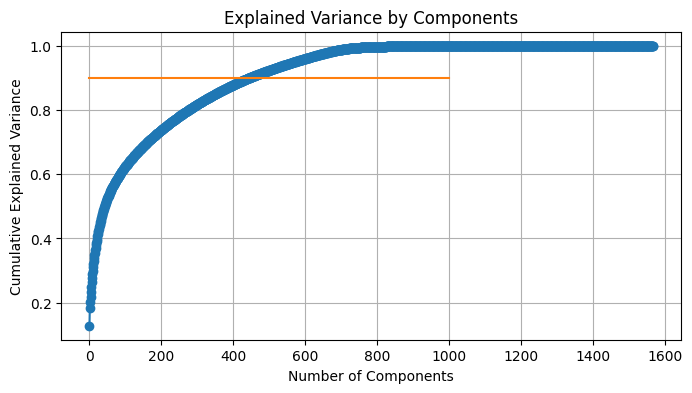

In [22]:
#There are a ton of features in the categorical data set, so I am going to perform PCA on it to help reduce them and see if I can improve the model
pca = PCA()
pca.fit(cat_x)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance, marker='o')
plt.plot([0, 1000], [0.9, 0.9])
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

In [32]:
#I am going to choose 453 because that will reduce the number of features but still account for 90% of the explained variance
pca = PCA(n_components=453)
pca.fit(cat_x)
cat_pca_x = pca.transform(cat_x)
cat_pca_test = pca.transform(cat_test)

In [37]:
#Trying out Random Forest with default number of estimators 
rf = RandomForestClassifier()
rf.fit(cat_pca_x,cat_y)
rf_y_pred = rf.predict(cat_pca_test)
print("Accuracy:", accuracy_score(cat_y_test, rf_y_pred))
print("Precision:", precision_score(cat_y_test, rf_y_pred, average='binary'))
print("Recall:", recall_score(cat_y_test, rf_y_pred, average='binary'))
print("F1 Score:", f1_score(cat_y_test, rf_y_pred, average='binary'))

Accuracy: 0.6940298507462687
Precision: 0.6923076923076923
Recall: 0.989010989010989
F1 Score: 0.8144796380090498


In [ ]:
#70% accuracy is not bad, but clearly its leaning toward guessing positive since the recall rate is so high 

In [38]:
rf_y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

In [39]:
#I want to look at these predictions alongside the playoff games 
playoff_2017 = pd.read_pickle('playoff_2017.pkl')
playoff_2017.head()

,Unnamed: 0,neutral_site,scheduled_date,gametime,attendance,lead_changes,times_tied,periods,venue_id,venue_city,...,a_points,a_fast_break_pts,a_second_chance_pts,a_team_turnovers,a_points_off_turnovers,a_team_rebounds,a_flagrant_fouls,a_player_tech_fouls,a_team_tech_fouls,a_coach_tech_fouls
9705,9778,False,3/14/2018,3/14/2018 3:00:00,1614.0,15.0,8.0,NaN,d03346fb-8618-4ad7-bbd8-1554a003c472,Los Angeles,...,98.0,2.0,17.0,2.0,18.0,5.0,0.0,0.0,0.0,0.0
9706,9779,False,3/15/2018,3/15/2018 2:00:00,3119.0,2.0,2.0,NaN,afe57543-ac2b-4b38-9f45-1b73ff001cc2,Seattle,...,77.0,13.0,5.0,0.0,20.0,1.0,0.0,0.0,0.0,0.0
9707,9780,False,3/14/2018,3/14/2018 1:00:00,5305.0,5.0,4.0,NaN,05b1ffbb-0b0c-4431-b454-e7d70462f5d1,Stillwater,...,68.0,10.0,1.0,0.0,17.0,7.0,0.0,0.0,0.0,1.0
9708,9781,False,3/14/2018,3/14/2018 23:00:00,3607.0,3.0,3.0,NaN,9bb9599c-17dd-4253-82bb-96fae950a32f,Milwaukee,...,60.0,16.0,12.0,0.0,21.0,4.0,0.0,0.0,0.0,0.0
9709,9782,False,3/15/2018,3/15/2018 1:00:00,3452.0,1.0,0.0,NaN,c06cdbce-91ba-4306-b31c-97df5cbf2515,Salt Lake City,...,59.0,4.0,4.0,0.0,16.0,5.0,0.0,1.0,0.0,0.0


In [40]:
playoff_games = playoff_2017[['h_alias','a_alias']]

In [41]:
playoff_games['actual result'] = cat_y_test
playoff_games['predicted result'] = rf_y_pred

C:\Users\Andrew\AppData\Local\Temp\ipykernel_34932\528228657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playoff_games['actual result'] = cat_y_test
C:\Users\Andrew\AppData\Local\Temp\ipykernel_34932\528228657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playoff_games['predicted result'] = rf_y_pred


In [43]:
pd.set_option('display.max_rows', None)
playoff_games

,h_alias,a_alias,actual result,predicted result
9705,USC,UNCA,1,1
9706,BSU,WASH,0,1
9707,OKST,FGCU,1,1
9708,MARQ,HARV,1,1
9709,UTAH,UCD,1,1
9710,ND,HAMP,1,1
9711,STAN,BYU,1,1
9712,PSU,TEM,1,1
9713,ORE,RID,1,1
9714,WKU,BC,1,1


In [ ]:
#it does correctly predict a few upsets, but mostly it is predicting the expected winner to win

In [44]:
#Trying out a nearest neighbor model with the default of 5
knn = KNeighborsClassifier()
knn.fit(cat_pca_x,cat_y)
knn_y_pred = knn.predict(cat_pca_test)
print("Accuracy:", accuracy_score(cat_y_test, knn_y_pred))
print("Precision:", precision_score(cat_y_test, knn_y_pred, average='binary'))
print("Recall:", recall_score(cat_y_test, knn_y_pred, average='binary'))
print("F1 Score:", f1_score(cat_y_test, knn_y_pred, average='binary'))

Accuracy: 0.6044776119402985
Precision: 0.6696428571428571
Recall: 0.8241758241758241
F1 Score: 0.7389162561576355


In [45]:
#results are lower across the board 
knn_y_pred
#Seeing a lot more )'s though, which is nice to see.  That means that its not overfitting to the training 

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0])

In [51]:
#I want to mess with the hyper parameters a bit now 
estimator_values = [50, 100, 200]
max_depth = [10,20,50,100]
min_samples_split = [2,5,10]
for est in estimator_values:
    for max in max_depth:
        for split in min_samples_split:
            rf = RandomForestClassifier(n_estimators = est, max_depth = max, min_samples_split = split)
            rf.fit(cat_pca_x,cat_y)
            rf_y_pred = rf.predict(cat_pca_test)
            print('Estimator Number:', est)
            print('Max Depth:', max)
            print('Min Samples per Split:', split)
            print("Accuracy:", accuracy_score(cat_y_test, rf_y_pred))
            print("Precision:", precision_score(cat_y_test, rf_y_pred, average='binary'))
            print("Recall:", recall_score(cat_y_test, rf_y_pred, average='binary'))
            print("F1 Score:", f1_score(cat_y_test, rf_y_pred, average='binary'))
            print()

Estimator Number: 50
Max Depth: 10
Min Samples per Split: 2
Accuracy: 0.664179104477612
Precision: 0.6742424242424242
Recall: 0.978021978021978
F1 Score: 0.7982062780269058

Estimator Number: 50
Max Depth: 10
Min Samples per Split: 5
Accuracy: 0.6791044776119403
Precision: 0.6791044776119403
Recall: 1.0
F1 Score: 0.8088888888888889

Estimator Number: 50
Max Depth: 10
Min Samples per Split: 10
Accuracy: 0.6716417910447762
Precision: 0.6766917293233082
Recall: 0.989010989010989
F1 Score: 0.8035714285714286

Estimator Number: 50
Max Depth: 20
Min Samples per Split: 2
Accuracy: 0.6865671641791045
Precision: 0.6842105263157895
Recall: 1.0
F1 Score: 0.8125

Estimator Number: 50
Max Depth: 20
Min Samples per Split: 5
Accuracy: 0.6940298507462687
Precision: 0.6953125
Recall: 0.978021978021978
F1 Score: 0.8127853881278538

Estimator Number: 50
Max Depth: 20
Min Samples per Split: 10
Accuracy: 0.6791044776119403
Precision: 0.6791044776119403
Recall: 1.0
F1 Score: 0.8088888888888889

Estimator Nu

In [55]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10,20,50,100],
    'min_samples_split' : [2,5,10]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1',verbose=2)
grid_search.fit(cat_pca_x, cat_y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.3s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.3s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.3s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.3s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   9.4s
[CV] END max_depth=10, min_samples_split=2, n_e

In [ ]:
#For the random forest, it doesn't seem to be making much difference.

In [56]:
neighbor_values = [3,5,7,9,11,13,15]
for n in neighbor_values:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(cat_pca_x,cat_y)
    knn_y_pred = knn.predict(cat_pca_test)
    print("Number of Neighbors:", n)
    print("Accuracy:", accuracy_score(cat_y_test, knn_y_pred))
    print("Precision:", precision_score(cat_y_test, knn_y_pred, average='binary'))
    print("Recall:", recall_score(cat_y_test, knn_y_pred, average='binary'))
    print("F1 Score:", f1_score(cat_y_test, knn_y_pred, average='binary'))
    print()

Number of Neighbors: 3
Accuracy: 0.5746268656716418
Precision: 0.660377358490566
Recall: 0.7692307692307693
F1 Score: 0.7106598984771574

Number of Neighbors: 5
Accuracy: 0.6044776119402985
Precision: 0.6696428571428571
Recall: 0.8241758241758241
F1 Score: 0.7389162561576355

Number of Neighbors: 7
Accuracy: 0.6492537313432836
Precision: 0.6864406779661016
Recall: 0.8901098901098901
F1 Score: 0.7751196172248804

Number of Neighbors: 9
Accuracy: 0.6567164179104478
Precision: 0.6923076923076923
Recall: 0.8901098901098901
F1 Score: 0.7788461538461539

Number of Neighbors: 11
Accuracy: 0.664179104477612
Precision: 0.6916666666666667
Recall: 0.9120879120879121
F1 Score: 0.7867298578199052

Number of Neighbors: 13
Accuracy: 0.6865671641791045
Precision: 0.6991869918699187
Recall: 0.945054945054945
F1 Score: 0.8037383177570093

Number of Neighbors: 15
Accuracy: 0.6716417910447762
Precision: 0.6910569105691057
Recall: 0.9340659340659341
F1 Score: 0.794392523364486



In [60]:
param_grid = {
    'n_neighbors': [3,5,7,9,11,13,15]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='f1',verbose=2)
grid_search.fit(cat_pca_x, cat_y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_

In [61]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(cat_pca_x,cat_y)
knn_y_pred = knn.predict(cat_pca_test)
print("Accuracy:", accuracy_score(cat_y_test, knn_y_pred))
print("Precision:", precision_score(cat_y_test, knn_y_pred, average='binary'))
print("Recall:", recall_score(cat_y_test, knn_y_pred, average='binary'))
print("F1 Score:", f1_score(cat_y_test, knn_y_pred, average='binary'))

Accuracy: 0.6716417910447762
Precision: 0.6910569105691057
Recall: 0.9340659340659341
F1 Score: 0.794392523364486


In [62]:
playoff_games['predicted result'] = knn_y_pred
playoff_games

C:\Users\Andrew\AppData\Local\Temp\ipykernel_34932\3579158462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playoff_games['predicted result'] = knn_y_pred


,h_alias,a_alias,actual result,predicted result
9705,USC,UNCA,1,1
9706,BSU,WASH,0,1
9707,OKST,FGCU,1,1
9708,MARQ,HARV,1,1
9709,UTAH,UCD,1,1
9710,ND,HAMP,1,1
9711,STAN,BYU,1,1
9712,PSU,TEM,1,1
9713,ORE,RID,1,1
9714,WKU,BC,1,1


In [63]:
#not bad, overall worse than random forest, but better at predicting upsets 

In [64]:
#I want to try option #2 which is a linear regression option that sets up my feature class differently

In [132]:
lin_test_x = pd.read_pickle('lin_test_x.pkl')

In [141]:
lr = LinearRegression()
lr.fit(lin_x,lin_y)
y_pred = lr.predict(lin_test_x)
predictions_df = pd.DataFrame(y_pred, columns=lin_y.columns)
r2 = r2_score(lin_y_test, y_pred)
print("R² Score:", r2)

R² Score: -0.34637035373417585


In [ ]:
#A negative R2 means this is not a good model, I will now be abondoning this model
#The best model found is the random forest model with the following parameters: Best parameters: {'max_depth': 10, 
#'min_samples_split': 2, 'n_estimators': 50}, which had a score of: Best score: 0.7929123375319278